In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import warnings
import pickle

In [2]:
df=pd.read_csv('data.csv')
df

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...,...
1088,1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [3]:
for col in df:
    print(df[col])
    print(df[col].unique())

0          0
1          1
2          2
3          3
4          4
        ... 
1088    1088
1089    1089
1090    1090
1091    1091
1092    1092
Name: Unnamed: 0, Length: 1093, dtype: int64
[   0    1    2 ... 1090 1091 1092]
0        7.4
1        7.8
2        6.7
3        8.6
4       12.4
        ... 
1088    18.1
1089    17.8
1090    13.9
1091    16.3
1092    16.3
Name: T, Length: 1093, dtype: float64
[ 7.4  7.8  6.7  8.6 12.4 16.  13.4 14.3 12.7 11.9 12.2 12.3 13.7 14.9
 15.  16.3 18.7 14.6 14.7 14.8 17.4 18.1 18.3 16.4 16.9 19.3 17.2 17.7
 20.4 18.2 19.  22.6 22.5 24.  23.8 23.  24.6 27.1 26.1 23.6 23.2 24.7
 25.6 25.7 25.1 29.5 29.2 31.1 29.8 28.2 28.3 29.3 30.5 28.  29.9 31.4
 29.7 32.8 34.1 30.9 32.9 30.6 36.2 36.8 37.7 35.6 33.6 31.9 32.4 34.2
 35.1 30.3 30.4 33.  31.  31.2 33.9 31.6 31.8 31.7 26.8 29.1 28.5 30.
 29.  32.2 28.4 28.1 27.4 30.1 27.7 32.1 32.  30.2 29.6 28.7 26.3 28.6
 28.9 27.9 29.4 27.5 26.6 25.  24.8 24.1 24.3 22.4 20.9 20.1 18.9 19.1
 17.8 17.6 17.  18.  21.1 21

Looking at the values

In [4]:
for col in df:
    print(col,' :',df[col].isna().sum())

Unnamed: 0  : 0
T  : 0
TM  : 0
Tm  : 0
SLP  : 0
H  : 0
VV  : 0
V  : 0
VM  : 0
PM 2.5  : 1


We can conclude that there is only one Na value in PM 2.5 column, well replae it with the mean

In [5]:
df['PM 2.5']=df['PM 2.5'].replace(np.nan,np.mean(df['PM 2.5']))

In [6]:
for col in df:
    print(col,' :',df[col].isna().sum())

Unnamed: 0  : 0
T  : 0
TM  : 0
Tm  : 0
SLP  : 0
H  : 0
VV  : 0
V  : 0
VM  : 0
PM 2.5  : 0


There are no NaN values

In [7]:
#Do visualisation here

In [8]:
Y=['Healthy' if df['PM 2.5'].iloc[i]<150 else 'Unhealthy' for i in range(len(df))]

In [9]:
Y=pd.DataFrame(Y,columns=['AQI'])
Y

,AQI
0,Unhealthy
1,Unhealthy
2,Unhealthy
3,Unhealthy
4,Unhealthy
...,...
1088,Unhealthy
1089,Unhealthy
1090,Unhealthy
1091,Unhealthy


In [10]:
X=df.drop(columns=['PM 2.5','Unnamed: 0'])

In [11]:
X

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2
...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=20)

**Performing K means and getting the best k**

In [13]:
def best_k(X_train, X_test, Y_train, Y_test,n):
    accls=[]
    for i in range(2,n):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train,Y_train)
        Y_pred=neigh.predict(X_test)
        score=accuracy_score(Y_test,Y_pred)
        accls.append([score,i])
    accls.sort(reverse=True)#Sorts in descending order of accuracy
    return(accls[0][1])#Returns the k corresponding to the best accuracy

In [14]:
k=best_k(X_train, X_test, Y_train, Y_test,100)
#Finidng the best k from 2-100 as using 1 would waste time and give us no substancial gain
k

/Users/kapilgoyal/Library/Python/3.11/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/kapilgoyal/Library/Python/3.11/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/kapilgoyal/Library/Python/3.11/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/kapilgoyal/Library/Python/3.11/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y

2

In [15]:
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,Y_train)
Y_pred=neigh.predict(X_test)
score=accuracy_score(Y_test,Y_pred)
score

/Users/kapilgoyal/Library/Python/3.11/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9115853658536586

Without scaling at the best possible k of 30 our accuracy is 91.1%

Performing scaling on our data

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train_transformed=scaler.transform(X_train)

In [18]:
def best_kn(X_train, X_test, Y_train, Y_test,n):
    accls=[]
    for i in range(2,n):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train,Y_train)
        Y_pred=neigh.predict(scaler.transform(X_test))
        score=accuracy_score(Y_test,Y_pred)
        accls.append([score,i])
    accls.sort(reverse=True)#Sorts in descending order of accuracy
    return(accls[0][1])#Returns the k corresponding to the best accuracy

In [19]:
k_n=best_kn(X_train_transformed, X_test, Y_train, Y_test,100)
k_n

/Users/kapilgoyal/Library/Python/3.11/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/kapilgoyal/Library/Python/3.11/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/kapilgoyal/Library/Python/3.11/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/kapilgoyal/Library/Python/3.11/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y

3

In [20]:
neigh = KNeighborsClassifier(n_neighbors=k_n)
neigh.fit(X_train,Y_train)
Y_pred_norm=neigh.predict(X_test)
score=accuracy_score(Y_test,Y_pred)
score

/Users/kapilgoyal/Library/Python/3.11/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9115853658536586

Performing scaling has no impact on accuracy but has a different k

Classification Report and Confusion matrix

For regular data

In [21]:
target_names = ['Healthy','Unhealthy']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Healthy       0.92      0.97      0.94       237
   Unhealthy       0.90      0.77      0.83        91

    accuracy                           0.91       328
   macro avg       0.91      0.87      0.88       328
weighted avg       0.91      0.91      0.91       328



In [22]:
def confusion_mat(Y_test, Y_pred, target_names):
    cm = confusion_matrix(Y_test, Y_pred, labels=target_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
    disp.plot()
    plt.show()

For normalsied data

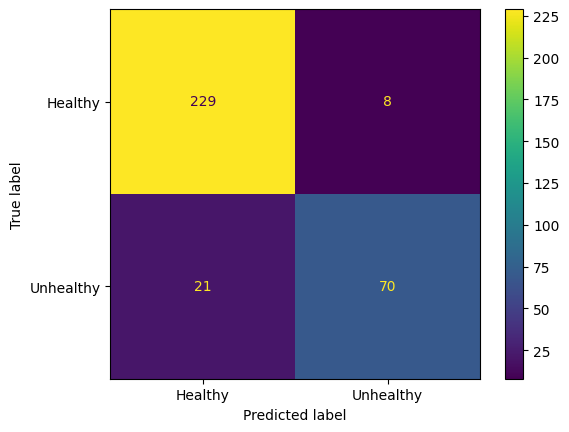

In [23]:
confusion_mat(Y_test, Y_pred, neigh.classes_)

In [24]:
print(classification_report(Y_test, Y_pred_norm, target_names=target_names))

              precision    recall  f1-score   support

     Healthy       0.93      0.89      0.91       237
   Unhealthy       0.75      0.82      0.79        91

    accuracy                           0.88       328
   macro avg       0.84      0.86      0.85       328
weighted avg       0.88      0.88      0.88       328



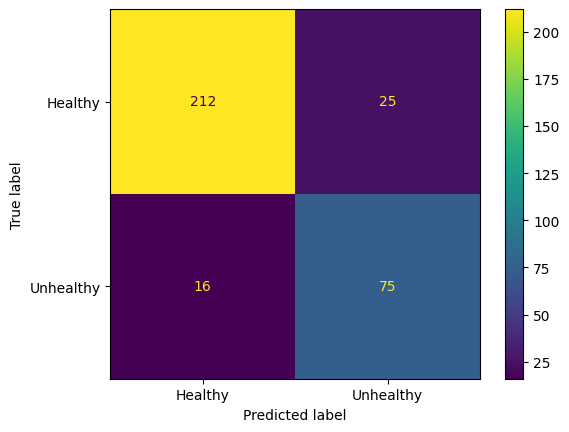

In [25]:
confusion_mat(Y_test, Y_pred_norm, neigh.classes_)

In conclusion both methods provide similar results

Performing Logistic Regression on the normalised data

In [26]:
clf = LogisticRegression(random_state=0).fit(X_train_transformed,Y_train)

/Users/kapilgoyal/Library/Python/3.11/lib/python/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
Y_pred_logi=clf.predict(scaler.transform(X_test))

Classification Report and Confusion Matrix for logistic regression

In [28]:
print(classification_report(Y_test,Y_pred_logi, target_names=target_names))

              precision    recall  f1-score   support

     Healthy       0.92      0.92      0.92       237
   Unhealthy       0.78      0.79      0.79        91

    accuracy                           0.88       328
   macro avg       0.85      0.85      0.85       328
weighted avg       0.88      0.88      0.88       328



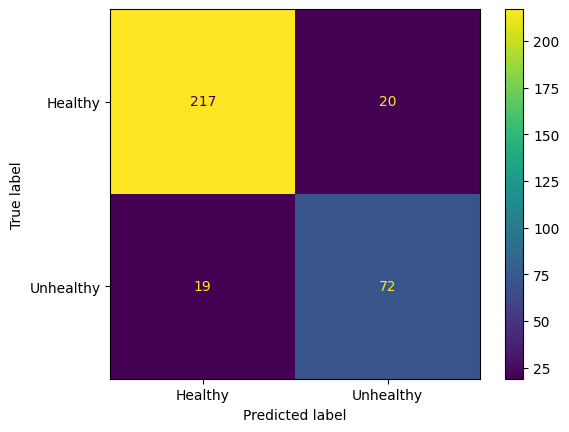

In [29]:
confusion_mat(Y_test, Y_pred_logi, neigh.classes_)

Logistic regression gives the same f1 score of 0.88 as both methords of knn

decision tree

Tree using gini as a criteria for splitting

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=None, min_samples_leaf=1)

In [31]:
clf_gini.fit(X,Y)

DecisionTreeClassifier(random_state=100)

[Text(0.4381400070621469, 0.9615384615384616, 'x[3] <= 1011.85\ngini = 0.397\nsamples = 1093\nvalue = [795, 298]'),
 Text(0.14124293785310735, 0.8846153846153846, 'x[0] <= 27.75\ngini = 0.07\nsamples = 656\nvalue = [632, 24]'),
 Text(0.0847457627118644, 0.8076923076923077, 'x[5] <= 3.0\ngini = 0.258\nsamples = 105\nvalue = [89, 16]'),
 Text(0.05649717514124294, 0.7307692307692307, 'x[7] <= 10.25\ngini = 0.145\nsamples = 89\nvalue = [82, 7]'),
 Text(0.03389830508474576, 0.6538461538461539, 'x[3] <= 1008.85\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.022598870056497175, 0.5769230769230769, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.04519774011299435, 0.5769230769230769, 'x[6] <= 3.9\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.03389830508474576, 0.5, 'x[6] <= 1.3\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.022598870056497175, 0.4230769230769231, 'x[7] <= 4.45\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.011299435028248588, 0.34615384615384615, 

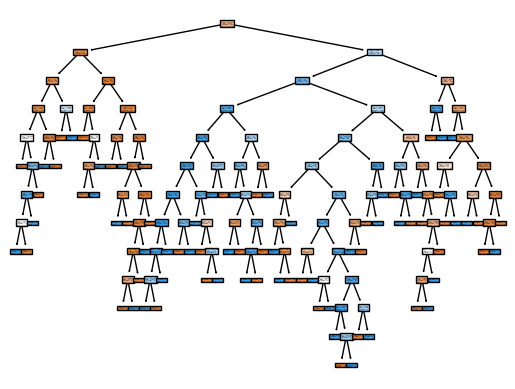

In [32]:
tree.plot_tree(clf_gini,filled=True)

In [33]:
y_pred_gini = clf_gini.predict(X_test)

In [34]:
print("Accuracy:",metrics.accuracy_score(Y_test,y_pred_gini))

Accuracy: 1.0


In [35]:
target_names = ['Healthy','Unhealthy']
print(classification_report(Y_test, y_pred_gini, target_names=target_names))

              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00       237
   Unhealthy       1.00      1.00      1.00        91

    accuracy                           1.00       328
   macro avg       1.00      1.00      1.00       328
weighted avg       1.00      1.00      1.00       328



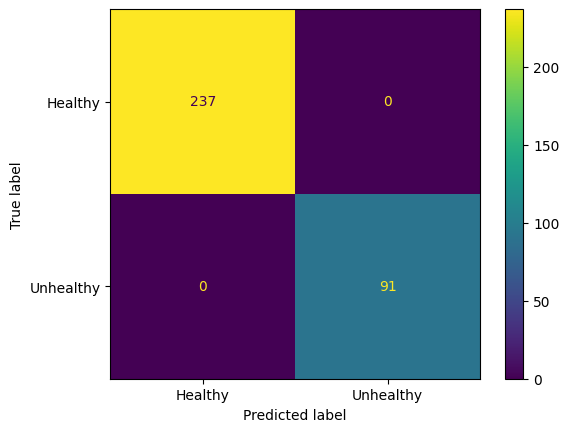

In [36]:
confusion_mat(Y_test,y_pred_gini, neigh.classes_)

In [37]:
#Tree using entropy as a criteria for splitting

In [38]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=None, min_samples_leaf=1)

In [39]:
clf_entropy.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', random_state=100)

[Text(0.4219812925170068, 0.9615384615384616, 'x[3] <= 1011.85\nentropy = 0.845\nsamples = 1093\nvalue = [795, 298]'),
 Text(0.1360544217687075, 0.8846153846153846, 'x[0] <= 27.75\nentropy = 0.226\nsamples = 656\nvalue = [632, 24]'),
 Text(0.08843537414965986, 0.8076923076923077, 'x[5] <= 3.0\nentropy = 0.616\nsamples = 105\nvalue = [89, 16]'),
 Text(0.05442176870748299, 0.7307692307692307, 'x[7] <= 10.25\nentropy = 0.397\nsamples = 89\nvalue = [82, 7]'),
 Text(0.027210884353741496, 0.6538461538461539, 'x[3] <= 1008.85\nentropy = 1.0\nsamples = 12\nvalue = [6, 6]'),
 Text(0.013605442176870748, 0.5769230769230769, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.04081632653061224, 0.5769230769230769, 'x[5] <= 1.35\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.027210884353741496, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.05442176870748299, 0.5, 'x[3] <= 1010.35\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.04081632653061224, 0.4230769230769231,

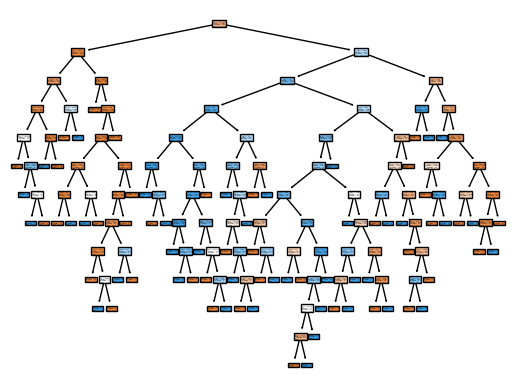

In [40]:
tree.plot_tree(clf_entropy,filled=True)

In [41]:
y_pred_entropy = clf_entropy.predict(X_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(Y_test,y_pred_entropy))

Accuracy: 1.0


In [43]:
target_names = ['Healthy','Unhealthy']
print(classification_report(Y_test, y_pred_entropy, target_names=target_names))

              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00       237
   Unhealthy       1.00      1.00      1.00        91

    accuracy                           1.00       328
   macro avg       1.00      1.00      1.00       328
weighted avg       1.00      1.00      1.00       328



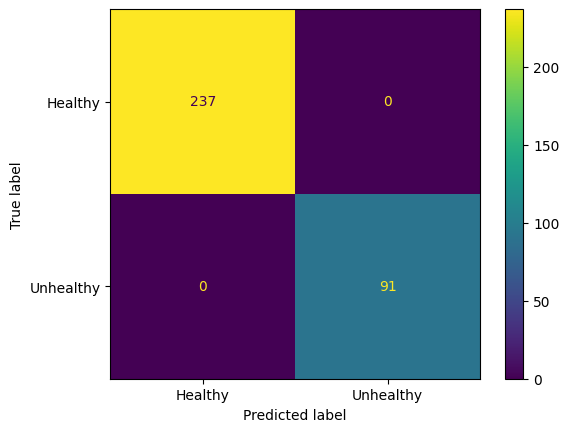

In [44]:
confusion_mat(Y_test,y_pred_entropy, neigh.classes_)

f1score = 1 for decision trees w/o pruning for both gini and entropy

with pruning

In [45]:
# Split  into training and validation sets
x_train, x_val,y_train, y_val= train_test_split(X, Y, test_size=0.2, random_state=42)

In [46]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

In [47]:
#  Decision Tree classifier
clf1 = DecisionTreeClassifier(random_state=42)

In [48]:
#  GridSearchCV
grid_search = GridSearchCV(clf1, param_grid, cv=5)

In [49]:
# Perform Grid Search Cross Validation
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [50]:
#  best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [51]:
#  best model
best_clf = grid_search.best_estimator_
print(best_clf)

DecisionTreeClassifier(max_depth=10, random_state=42)


In [52]:
# Evaluating the best model on validation set
y_pred_val = best_clf.predict(x_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", val_accuracy)



Validation Accuracy: 0.9269406392694064


by using gridsearchcv we can infer that pruning is done at max depth=10 with min sample leaf=1, the best criterion amongst gini and entropy is gini.

so now we will perform pruning using gini for max_depth=10

In [53]:
# Pruning the tree- limit the depth of tree to 10
model_gini_prune = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth=11, min_samples_leaf=1)


In [54]:
model_gini_prune.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=11, random_state=100)

[Text(0.4963860544217687, 0.9583333333333334, 'x[0] <= 23.3\ngini = 0.395\nsamples = 765\nvalue = [558, 207]'),
 Text(0.28528911564625853, 0.875, 'x[5] <= 1.2\ngini = 0.438\nsamples = 266\nvalue = [86, 180]'),
 Text(0.1360544217687075, 0.7916666666666666, 'x[4] <= 85.5\ngini = 0.195\nsamples = 128\nvalue = [14, 114]'),
 Text(0.06802721088435375, 0.7083333333333334, 'x[3] <= 1019.85\ngini = 0.073\nsamples = 105\nvalue = [4, 101]'),
 Text(0.04081632653061224, 0.625, 'x[6] <= 1.0\ngini = 0.022\nsamples = 92\nvalue = [1, 91]'),
 Text(0.027210884353741496, 0.5416666666666666, 'x[5] <= 1.05\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.013605442176870748, 0.4583333333333333, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.04081632653061224, 0.4583333333333333, 'x[1] <= 25.9\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.027210884353741496, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05442176870748299, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(

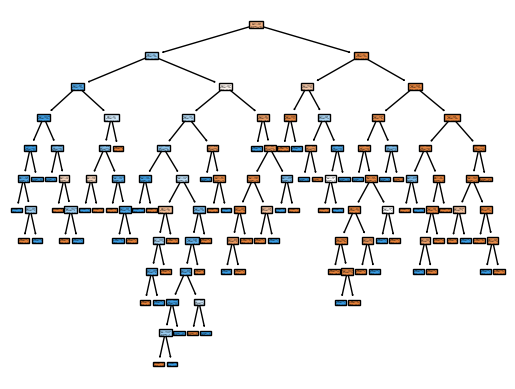

In [55]:
tree.plot_tree(model_gini_prune,filled=True)

In [56]:
y_pred_gini_prune = model_gini_prune.predict(X_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(Y_test,y_pred_gini_prune))

Accuracy: 0.8780487804878049


In [58]:
target_names = ['Healthy','Unhealthy']
print(classification_report(Y_test, y_pred_gini_prune, target_names=target_names))

              precision    recall  f1-score   support

     Healthy       0.93      0.89      0.91       237
   Unhealthy       0.75      0.84      0.79        91

    accuracy                           0.88       328
   macro avg       0.84      0.86      0.85       328
weighted avg       0.88      0.88      0.88       328



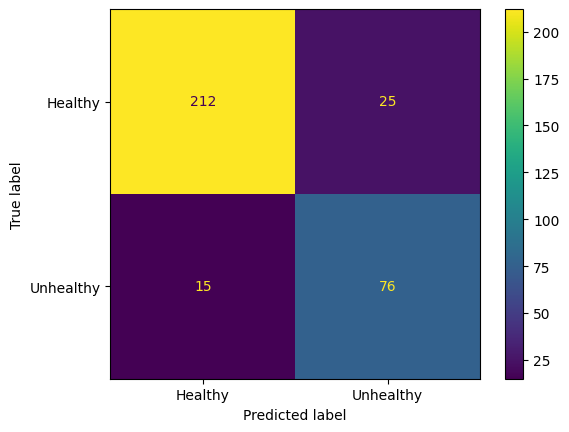

In [59]:
confusion_mat(Y_test,y_pred_gini_prune, neigh.classes_)

Accuracy for depth =2:,81.40243902439023%
Accuracy for depth =3:,84.14634146341463%
Accuracy for depth =4:,85.36585365853658%
Accuracy for depth =5:,84.14634146341463%
Accuracy for depth =6:,87.1951219512195%
Accuracy for depth =7:,85.97560975609755%
Accuracy for depth =8:,87.1951219512195%
Accuracy for depth =9:,88.71951219512195%
Accuracy for depth =10:,88.71951219512195%
Accuracy for depth =11:,87.8048780487805%
Accuracy for depth =12:,87.8048780487805%
Accuracy for depth =13:,87.8048780487805%
Accuracy for depth =14:,87.8048780487805%
Accuracy for depth =15:,87.8048780487805%
Accuracy for depth =16:,87.8048780487805%
Accuracy for depth =17:,87.8048780487805%
Accuracy for depth =18:,87.8048780487805%
Accuracy for depth =19:,87.8048780487805%
Accuracy for depth =20:,87.8048780487805%
Accuracy for depth =21:,87.8048780487805%
Accuracy for depth =22:,87.8048780487805%
Accuracy for depth =23:,87.8048780487805%
Accuracy for depth =24:,87.8048780487805%
Accuracy for depth =25:,87.80487804

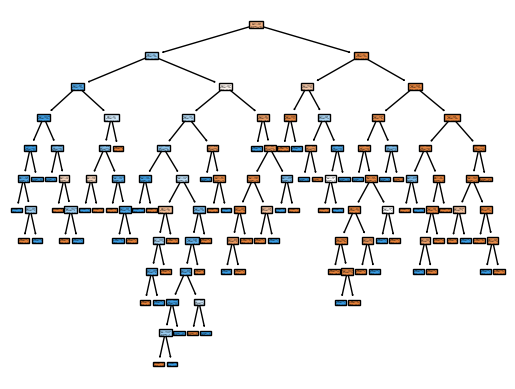

In [60]:
#just crost checking - Vary the depth of tree and note the accuracy
for i in range(2,30):
  model_gini_2 = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth=i, min_samples_leaf=1)
  model_gini_2.fit(X_train,Y_train)
  tree.plot_tree(model_gini_2,filled=True)
  y_pred12 = model_gini_2.predict(X_test)
  print(f'Accuracy for depth ={i}:,{metrics.accuracy_score(Y_test, y_pred12)*100}%')

random forest classifier

In [61]:
rfc = RandomForestClassifier(n_estimators=100)

In [62]:
rfc.fit(X_train,Y_train)

/Users/kapilgoyal/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [63]:
y_pred_rfc = rfc.predict(X_test)

In [64]:
print("Accuracy:",metrics.accuracy_score(Y_test,y_pred_rfc))

Accuracy: 0.9512195121951219


In [65]:
target_names = ['Healthy','Unhealthy']
print(classification_report(Y_test, y_pred_rfc, target_names=target_names))

              precision    recall  f1-score   support

     Healthy       0.99      0.95      0.97       237
   Unhealthy       0.87      0.97      0.92        91

    accuracy                           0.95       328
   macro avg       0.93      0.96      0.94       328
weighted avg       0.95      0.95      0.95       328



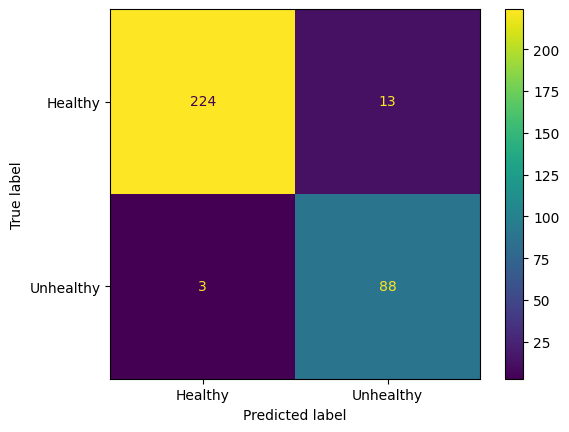

In [66]:
confusion_mat(Y_test,y_pred_rfc, neigh.classes_)

Based on all the models we have performed decission trees produce thje best results thus we will be using that for our pickel model

In [67]:
pickle.dump(clf_gini,open('clf_gini.pkl','wb'))

In [68]:
pickle.dump(scaler,open('scaler.pkl','wb'))